In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
df = pd.read_csv('Pregnancy Risk.csv')

df1 = df.drop(['Unnamed: 0'],axis=1)

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
col = ['Blood Group ( is Negative?)','Jaundice','Diabetes','Risk']
for x in col:
    df1[x] = encoder.fit_transform(df[x])
    
df2 = pd.get_dummies(df1,drop_first=True)

X = df2.drop(['Risk','Height','Weight'],axis=1)
y = df2.Risk

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [2]:
df.shape

(1633, 16)

In [3]:
y_train.value_counts()

0    836
1    307
Name: Risk, dtype: int64

In [4]:
y_test.value_counts()

0    351
1    139
Name: Risk, dtype: int64

In [5]:
len(X_test)

490

In [6]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [7]:
def model(model,i):
    print(i,'.',model,':\n')
    model = model.fit(X_train,y_train)

    #train data
    y_pred = model.predict(X_train)
    print('\tTraining Data:')
    print('\t\t> Accuracy: ', round(accuracy_score(y_train,y_pred),2)*100,'%',end=" ")
    print('\t> f1_score: ', round(f1_score(y_train,y_pred, average='micro'),2)*100,'%',end=" ")
    print('\t> precision_score: ', round(precision_score(y_train,y_pred, average='micro'),2)*100,'%',end=" ")
    print('\t> recall_score: ', round(recall_score(y_train,y_pred, average='micro'),2)*100,'%',end=" ")

    #test data
    y_pred = model.predict(X_test)
    print('\n\tTesting Data:')
    print('\t\t> Accuracy: ', round(accuracy_score(y_test,y_pred),2)*100,'%',end=" ")
    print('\t> f1_score: ', round(f1_score(y_test,y_pred, average='micro'),2)*100,'%',end=" ")
    print('\t> precision_score: ', round(precision_score(y_test,y_pred, average='micro'),2)*100,'%',end=" ")
    print('\t> recall_score: ', round(recall_score(y_test,y_pred, average='micro'),2)*100,'%','\n')

In [8]:
model(LogisticRegression(),1)
model(SVC(),2)
model(DecisionTreeClassifier(),3)
model(RandomForestClassifier(),4)
model(KNeighborsClassifier(),5)
model(GaussianNB(),6)
model(MultinomialNB(),7)

1 . LogisticRegression() :

	Training Data:
		> Accuracy:  78.0 % 	> f1_score:  78.0 % 	> precision_score:  78.0 % 	> recall_score:  78.0 % 
	Testing Data:
		> Accuracy:  80.0 % 	> f1_score:  80.0 % 	> precision_score:  80.0 % 	> recall_score:  80.0 % 

2 . SVC() :

	Training Data:
		> Accuracy:  73.0 % 	> f1_score:  73.0 % 	> precision_score:  73.0 % 	> recall_score:  73.0 % 
	Testing Data:
		> Accuracy:  72.0 % 	> f1_score:  72.0 % 	> precision_score:  72.0 % 	> recall_score:  72.0 % 

3 . DecisionTreeClassifier() :

	Training Data:
		> Accuracy:  100.0 % 	> f1_score:  100.0 % 	> precision_score:  100.0 % 	> recall_score:  100.0 % 
	Testing Data:
		> Accuracy:  90.0 % 	> f1_score:  90.0 % 	> precision_score:  90.0 % 	> recall_score:  90.0 % 

4 . RandomForestClassifier() :

	Training Data:
		> Accuracy:  100.0 % 	> f1_score:  100.0 % 	> precision_score:  100.0 % 	> recall_score:  100.0 % 
	Testing Data:
		> Accuracy:  93.0 % 	> f1_score:  93.0 % 	> precision_score:  93.0 % 	> recall_

# Other Test

In [9]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
df = pd.read_csv('Pregnancy Risk.csv')

df1 = df.drop(['Unnamed: 0'],axis=1)

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
col = ['Blood Group ( is Negative?)','Jaundice','Diabetes','Risk','Delivery Type','Edema','Anemia']
for x in col:
    df1[x] = encoder.fit_transform(df[x])

In [10]:
train = df1[:860]
test = df1[860:]

In [11]:
x_tt = train.drop(['Risk','Height','Weight'],axis=1)
y_tt = train.Risk

In [12]:
x_tt.columns

Index(['Age', 'BMI', 'Blood Group ( is Negative?)', 'Delivery Type',
       'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Edema',
       'Anemia', 'Jaundice', 'Diabetes', 'Para', 'Gravida'],
      dtype='object')

In [13]:
x_te = test.drop(['Risk','Height','Weight'],axis=1)
y_te = test.Risk

In [14]:
y_te.value_counts()

0    625
1    148
Name: Risk, dtype: int64

In [15]:
y_tt.value_counts()

0    562
1    298
Name: Risk, dtype: int64

In [16]:
def model(model,i):
    print(i,'.',model,':\n')
    model = model.fit(x_tt,y_tt)

    #train data
    y_pred = model.predict(x_tt)
    print('\tTraining Data:')
    print('\t\t> Accuracy: ', round(accuracy_score(y_tt,y_pred),2)*100,'%',end=" ")
    print('\t> f1_score: ', round(f1_score(y_tt,y_pred, average='micro'),2)*100,'%',end=" ")
    print('\t> precision_score: ', round(precision_score(y_tt,y_pred, average='micro'),2)*100,'%',end=" ")
    print('\t> recall_score: ', round(recall_score(y_tt,y_pred, average='micro'),2)*100,'%',end=" ")

    #test data
    y_pred = model.predict(x_te)
    print('\n\tTesting Data:')
    print('\t\t> Accuracy: ', round(accuracy_score(y_te,y_pred),2)*100,'%',end=" ")
    print('\t> f1_score: ', round(f1_score(y_te,y_pred, average='micro'),2)*100,'%',end=" ")
    print('\t> precision_score: ', round(precision_score(y_te,y_pred, average='micro'),2)*100,'%',end=" ")
    print('\t> recall_score: ', round(recall_score(y_te,y_pred, average='micro'),2)*100,'%','\n')

In [17]:
model(LogisticRegression(),1)
model(SVC(),2)
model(DecisionTreeClassifier(),3)
model(RandomForestClassifier(),4)
model(KNeighborsClassifier(),5)
model(GaussianNB(),6)
model(MultinomialNB(),7)

1 . LogisticRegression() :

	Training Data:
		> Accuracy:  75.0 % 	> f1_score:  75.0 % 	> precision_score:  75.0 % 	> recall_score:  75.0 % 
	Testing Data:
		> Accuracy:  84.0 % 	> f1_score:  84.0 % 	> precision_score:  84.0 % 	> recall_score:  84.0 % 

2 . SVC() :

	Training Data:
		> Accuracy:  67.0 % 	> f1_score:  67.0 % 	> precision_score:  67.0 % 	> recall_score:  67.0 % 
	Testing Data:
		> Accuracy:  82.0 % 	> f1_score:  82.0 % 	> precision_score:  82.0 % 	> recall_score:  82.0 % 

3 . DecisionTreeClassifier() :

	Training Data:
		> Accuracy:  100.0 % 	> f1_score:  100.0 % 	> precision_score:  100.0 % 	> recall_score:  100.0 % 
	Testing Data:
		> Accuracy:  86.0 % 	> f1_score:  86.0 % 	> precision_score:  86.0 % 	> recall_score:  86.0 % 

4 . RandomForestClassifier() :

	Training Data:
		> Accuracy:  100.0 % 	> f1_score:  100.0 % 	> precision_score:  100.0 % 	> recall_score:  100.0 % 
	Testing Data:
		> Accuracy:  91.0 % 	> f1_score:  91.0 % 	> precision_score:  91.0 % 	> recall_

In [18]:
rm_model = RandomForestClassifier()
rm_model.fit(x_tt,y_tt)

#train data
yt_pred = rm_model.predict(x_tt)
print('Training Data:')
print('Accuracy: ', round(accuracy_score(y_tt,yt_pred),2))
print('f1_score: ', round(f1_score(y_tt,yt_pred, average='micro'),2))
print('precision_score: ', round(precision_score(y_tt,yt_pred, average='micro'),2))
print('recall_score: ', round(recall_score(y_tt,yt_pred, average='micro'),2))

#test data
y_pred = rm_model.predict(x_te)
print('\nTesting Data:')
print('Accuracy: ', round(accuracy_score(y_te,y_pred),2))
print('f1_score: ', round(f1_score(y_te,y_pred, average='micro'),2))
print('precision_score: ', round(precision_score(y_te,y_pred, average='micro'),2))
print('recall_score: ', round(recall_score(y_te,y_pred, average='micro'),2))

Training Data:
Accuracy:  1.0
f1_score:  1.0
precision_score:  1.0
recall_score:  1.0

Testing Data:
Accuracy:  0.91
f1_score:  0.91
precision_score:  0.91
recall_score:  0.91


model test AUC score: 0.870027027027027
model train AUC score: 0.9982206405693951


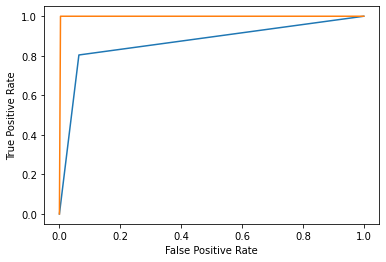

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

def plot_roc_curve(true_y, y_prob):
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
#     plt.plot(thresholds)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(y_te,y_pred)
plot_roc_curve(y_tt,yt_pred)
print(f'model test AUC score: {roc_auc_score(y_te,y_pred)}')
print(f'model train AUC score: {roc_auc_score(y_tt,yt_pred)}')

In [20]:
# from sklearn import tree
# import sys
# plt.figure(figsize=(100,100))
# tree.plot_tree(dt_model,feature_names=X_train.columns)
# plt.savefig("tree.png")